### Download dataset 

https://www.openml.org/search?type=data&sort=runs&status=active&id=1067

In [1]:
!wget  -P ./data/ https://www.openml.org/data/download/53950/kc1.arff

--2024-12-23 10:51:29--  https://www.openml.org/data/download/53950/kc1.arff
Resolving www.openml.org (www.openml.org)... 131.155.11.11
Connecting to www.openml.org (www.openml.org)|131.155.11.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167423 (163K) [text/plain]
Saving to: './data/kc1.arff'

     0K .......... .......... .......... .......... .......... 30%  520K 0s
    50K .......... .......... .......... .......... .......... 61% 1.02M 0s
   100K .......... .......... .......... .......... .......... 91% 12.3M 0s
   150K .......... ...                                        100% 6.41M=0.1s

2024-12-23 10:51:29 (1.07 MB/s) - './data/kc1.arff' saved [167423/167423]



### Load a dataset into a DF

In [104]:
import pandas as pd
from scipy.io import arff
import numpy as np
import matplotlib.pyplot as plt

In [105]:
# Load ARFF file
data, meta = arff.loadarff('data/kc1.arff')

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# To decode byte strings into ordinary strings 
df = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)


df['target'] = df['defects'].map({'true': 1, 'false': 0})
del df['defects']

C:\Users\Dzmitry_Shametska\AppData\Local\Temp\ipykernel_27128\835703110.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode() if isinstance(x, bytes) else x)


In [106]:
df.dtypes

loc                  float64
v(g)                 float64
ev(g)                float64
iv(g)                float64
n                    float64
v                    float64
l                    float64
d                    float64
i                    float64
e                    float64
b                    float64
t                    float64
lOCode               float64
lOComment            float64
lOBlank              float64
locCodeAndComment    float64
uniq_Op              float64
uniq_Opnd            float64
total_Op             float64
total_Opnd           float64
branchCount          float64
target                 int64
dtype: object

In [107]:
df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,target
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65.0,10.0,6.0,0.0,18.0,25.0,107.0,64.0,21.0,1
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37.0,2.0,5.0,0.0,16.0,28.0,89.0,52.0,15.0,1
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21.0,0.0,2.0,0.0,11.0,10.0,41.0,17.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,19.0,2.0,1.0,2.0,40.0,175.69,0.15,6.82,25.77,1197.90,...,12.0,1.0,2.0,0.0,10.0,11.0,25.0,15.0,3.0,0
2105,23.0,3.0,3.0,3.0,60.0,278.63,0.10,9.69,28.75,2700.58,...,18.0,1.0,2.0,0.0,12.0,13.0,39.0,21.0,5.0,0
2106,2.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,0.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0,1.0,0
2107,13.0,1.0,1.0,1.0,17.0,60.94,0.25,4.00,15.24,243.78,...,6.0,0.0,5.0,0.0,6.0,6.0,9.0,8.0,1.0,0


# EDA

Results:  
 - check target value distribution: 15 percents of programs have defects
 - according to the Corellation analysis of numerical features, the most important are:
      - total operands (total_Opnd)
      - unique operators(uniq_Op)
      - unique operands(uniq_Opnd)
      - Halstead "difficulty" (d)


### Check NULLs

In [108]:
# no-null values are in DF
df.isnull().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
target               0
dtype: int64

### Check target value distribution

In [109]:
# check target value distribution
df.target.value_counts()

target
0    1783
1     326
Name: count, dtype: int64

In [110]:
# check target value distribution
#  11 percents of customers apply to a marketing company 
df.target.value_counts(normalize=True)

target
0    0.845424
1    0.154576
Name: proportion, dtype: float64

In [111]:
# global percentage of successfull marketing company (target = 1)
global_mean = df.target.mean()
global_mean

np.float64(0.15457562825983878)

### Check corellation for numerical features

In [112]:
numerical_columns = list(df.columns)
numerical_columns.remove('target')
print(numerical_columns)

['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']


In [113]:
df[numerical_columns].corrwith(df.target).to_frame('correlation').abs().sort_values('correlation')

,correlation
locCodeAndComment,0.005067
ev(g),0.205159
lOComment,0.232866
l,0.232877
e,0.270070
t,0.270071
v(g),0.295570
iv(g),0.295694
branchCount,0.297827
lOBlank,0.323620


# Training models

### LogisticRegression
 - Get the best C-parameter by evaluating ROC Curve. Best C = 5
 - AUC val =  0.838
 - AUC test = 0.794

### Decision tree 
 - Tuning: max_depth = 2, leaf = 100
 - AUC val = 0.799
 - AUC test = 0.779

### Random forest
 - Tuning: n_estimators = 140 , max_dpth = 30
 - AUC val =  0.85
 - AUC test = 0.818

### XGBoost
 - Tuning: min_child_weight = 30, eta=0.8, max_depth = 7
 - AUC val = 	0.85
 - AUC test = 0.775



The best perfomance (by AUC score) is  for Random Forest model with n_estimators = 140 and max_depth = 30.  The treeshold to convert probabilty into Target value (0, 1) is 0.65


### Split dataset

In [166]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

del df_train['target']
del df_val['target']
del df_test['target']

In [115]:
len(df_train), len(df_val), len(df_test)

(1265, 422, 422)

### Vectorize  datasets

In [116]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

train_dict = df_train[numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test[numerical_columns].to_dict(orient='records')
X_test = dv.transform(test_dict)

### Train logistic regression

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
model = LogisticRegression(solver='newton-cg', C=1, max_iter=100)
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

LogisticRegression(C=1, solver='newton-cg')

In [119]:
y_pred = model.predict_proba(X_val)[:, 1]

In [120]:
from sklearn.metrics import accuracy_score

In [121]:

accuracy_score(y_val, y_pred >= 0.35)

0.8364928909952607

In [122]:
y_pred_tst = model.predict_proba(X_test)[:, 1]

In [123]:
# Get the best treeshold to convert probabilty into target
# Best treshould is 0.65
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.5f' % (t, score))
    scores.append(score)

0.00 0.15640
0.05 0.49763
0.10 0.64218
0.15 0.75592
0.20 0.77251
0.25 0.81754
0.30 0.84123
0.35 0.83649
0.40 0.85071
0.45 0.86019
0.50 0.86256
0.55 0.86493
0.60 0.86493
0.65 0.86730
0.70 0.86256
0.75 0.85782
0.80 0.85782
0.85 0.85071
0.90 0.84360
0.95 0.84360
1.00 0.84360


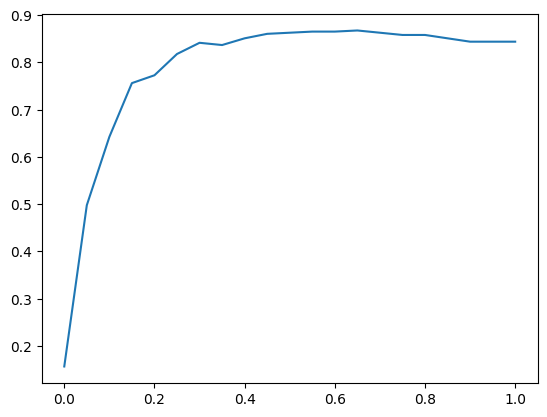

In [124]:
plt.plot(thresholds, scores)

In [125]:
from sklearn.metrics import roc_auc_score

In [126]:
roc_auc_score(y_val, y_pred)

np.float64(0.8381426625808648)

In [127]:
#Get the best C-parameter by evaluating ROC Curve
# Best C = 5
auc_score = []
c_list = [0.001, 0.01, 0.1, 0.5, 1, 5, 10]
for c in c_list:
    model = LogisticRegression(solver='newton-cg', C=c, max_iter=100)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    auc_score.append(auc)
    print(f'C={c}  AUC={auc}')

C=0.001  AUC=0.8240977187606401
C=0.01  AUC=0.8298433775961865
C=0.1  AUC=0.8335886959482464
C=0.5  AUC=0.8347803881511746
C=1  AUC=0.8381426625808648
C=5  AUC=0.8384831460674157
C=10  AUC=0.8381001021450459


In [128]:
# AUC on test dataset
model = LogisticRegression(solver='newton-cg', C=10, max_iter=100)
model.fit(X_train, y_train)
y_pred_tst = model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_pred_tst)
auc_test

np.float64(0.7938139446760137)

### Decision tree

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [130]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [133]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

np.float64(0.7550646918624447)

In [134]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- v <= 306.36
|   |--- lOCode <= 3.50
|   |   |--- b <= 0.51
|   |   |   |--- lOCode <= 1.50
|   |   |   |   |--- l <= 0.45
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- l >  0.45
|   |   |   |   |   |--- class: 0
|   |   |   |--- lOCode >  1.50
|   |   |   |   |--- i <= 8.07
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- i >  8.07
|   |   |   |   |   |--- class: 0
|   |   |--- b >  0.51
|   |   |   |--- t <= 1.15
|   |   |   |   |--- class: 1
|   |   |   |--- t >  1.15
|   |   |   |   |--- class: 0
|   |--- lOCode >  3.50
|   |   |--- n <= 55.50
|   |   |   |--- loc <= 28.50
|   |   |   |   |--- lOBlank <= 6.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- lOBlank >  6.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- loc >  28.50
|   |   |   |   |--- class: 1
|   |   |--- n >  55.50
|   |   |   |--- i <= 23.44
|   |   |   |   |--- t <= 198.34
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- t >  198.34
|   |   |   |   |   |--- class: 0
|   |   |

In [135]:
# Get the best max_depth  - 2 
depths = [1, 2, 3, 4, 5, 6, 7,8,9,10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.715
   2 -> 0.798
   3 -> 0.750
   4 -> 0.769
   5 -> 0.770
   6 -> 0.728
   7 -> 0.729
   8 -> 0.748
   9 -> 0.700
  10 -> 0.706
  15 -> 0.611
  20 -> 0.659
None -> 0.656


In [136]:
scores = []

for s in [1, 5, 10, 15, 20, 500, 100, 200, 1000]:
    dt = DecisionTreeClassifier(max_depth=2, min_samples_leaf=s)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((depth, s, auc))
    print('%4s -> %.3f' % (s, auc))



   1 -> 0.798
   5 -> 0.798
  10 -> 0.798
  15 -> 0.798
  20 -> 0.798
 500 -> 0.748
 100 -> 0.794
 200 -> 0.792
1000 -> 0.500


In [137]:
# AUC on test dataset
model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=100)
model.fit(X_train, y_train)
y_pred_tst = model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_pred_tst)
auc_test

np.float64(0.7796276998863205)

### Random forest

In [138]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))
    print('%4s -> %.3f' % (n, auc))

  10 -> 0.795
  20 -> 0.820
  30 -> 0.826
  40 -> 0.835
  50 -> 0.834
  60 -> 0.837
  70 -> 0.842
  80 -> 0.841
  90 -> 0.845
 100 -> 0.845
 110 -> 0.845
 120 -> 0.845
 130 -> 0.847
 140 -> 0.850
 150 -> 0.848
 160 -> 0.849
 170 -> 0.849
 180 -> 0.850
 190 -> 0.851
 200 -> 0.851


In [140]:
scores = []
depths = [1, 2, 3, 4, 5, 6, 7,8,9,10, 15, 20, 25, 30, None]
for n in depths:
    rf = RandomForestClassifier(n_estimators=140 , max_depth=n ,random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))
    print('%4s -> %.3f' % (n, auc))

   1 -> 0.813
   2 -> 0.819
   3 -> 0.833
   4 -> 0.838
   5 -> 0.843
   6 -> 0.848
   7 -> 0.842
   8 -> 0.847
   9 -> 0.844
  10 -> 0.841
  15 -> 0.844
  20 -> 0.847
  25 -> 0.847
  30 -> 0.850
None -> 0.850


In [141]:
# AUC on test dataset
model = RandomForestClassifier(n_estimators=140 , max_depth=30 ,random_state=1)
model.fit(X_train, y_train)
y_pred_tst = model.predict_proba(X_test)[:, 1]
auc_test = roc_auc_score(y_test, y_pred_tst)
auc_test

np.float64(0.8176866237211065)

In [142]:
# Get the best treeshold to convert probabilty into target
# Best treshold is 0.65 

model = RandomForestClassifier(n_estimators=140 , max_depth=30 ,random_state=1)
model.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]


thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.5f' % (t, score))
    scores.append(score)

0.00 0.15640
0.05 0.60900
0.10 0.69668
0.15 0.76066
0.20 0.76540
0.25 0.79621
0.30 0.81991
0.35 0.84123
0.40 0.83886
0.45 0.84597
0.50 0.84597
0.55 0.85782
0.60 0.85782
0.65 0.87441
0.70 0.86256
0.75 0.85782
0.80 0.84597
0.85 0.84123
0.90 0.84360
0.95 0.84360
1.00 0.84360


### XGBoost

In [143]:
import xgboost as xgb

In [144]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [145]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 14,
    'min_child_weight': 14,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [146]:
y_pred = model.predict(dval)

In [147]:
roc_auc_score(y_val, y_pred)

np.float64(0.8400366019748042)

In [148]:
#  best eta  = 0.7
for eta in [0.1 , 0.2, 0.3 , 0.4, 0.5 , 0.6 , 0.7, 0.8, 0.9]:
    xgb_params = {
    'eta': eta, 
    'max_depth': 14,
    'min_child_weight': 14,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=10)
    y_pred = model.predict(dval)
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (eta, auc))
    
    

 0.1 -> 0.825
 0.2 -> 0.830
 0.3 -> 0.840
 0.4 -> 0.838
 0.5 -> 0.841
 0.6 -> 0.829
 0.7 -> 0.829
 0.8 -> 0.813
 0.9 -> 0.815


In [149]:
#  best eta  = 0.5
eta  = 0.5

scores = []
for min_child_weight in [1,10,30]:
    for eta in [0.1 , 0.2, 0.3 , 0.4, 0.5 , 0.6 , 0.7, 0.8, 0.9]:    
        for max_depth in [1, 2, 3, 4, 5, 6, 7,8,9,10, 15, 20, 25, 30, None]:
            xgb_params = {
            'eta': eta, 
            'max_depth': max_depth,
            'min_child_weight': 1,
            
            'objective': 'binary:logistic',
            'nthread': 8,
            
            'seed': 1,
            'verbosity': 1,
            }
        
            model = xgb.train(xgb_params, dtrain, num_boost_round=10)
            y_pred = model.predict(dval)
            auc = roc_auc_score(y_val, y_pred)

            scores.append({
                'min_child_weight':min_child_weight,
                'eta':eta,
                'max_depth':max_depth,
                'auc':auc
            })
        
print(scores)

[{'min_child_weight': 1, 'eta': 0.1, 'max_depth': 1, 'auc': np.float64(0.7981784133469527)}, {'min_child_weight': 1, 'eta': 0.1, 'max_depth': 2, 'auc': np.float64(0.8185435818862785)}, {'min_child_weight': 1, 'eta': 0.1, 'max_depth': 3, 'auc': np.float64(0.8150323459312223)}, {'min_child_weight': 1, 'eta': 0.1, 'max_depth': 4, 'auc': np.float64(0.8249702076949268)}, {'min_child_weight': 1, 'eta': 0.1, 'max_depth': 5, 'auc': np.float64(0.8247574055158327)}, {'min_child_weight': 1, 'eta': 0.1, 'max_depth': 6, 'auc': np.float64(0.8233316309159004)}, {'min_child_weight': 1, 'eta': 0.1, 'max_depth': 7, 'auc': np.float64(0.8184371807967314)}, {'min_child_weight': 1, 'eta': 0.1, 'max_depth': 8, 'auc': np.float64(0.8105209397344229)}, {'min_child_weight': 1, 'eta': 0.1, 'max_depth': 9, 'auc': np.float64(0.8041581545795029)}, {'min_child_weight': 1, 'eta': 0.1, 'max_depth': 10, 'auc': np.float64(0.8070948246510044)}, {'min_child_weight': 1, 'eta': 0.1, 'max_depth': 15, 'auc': np.float64(0.81324

In [150]:
df_scores = pd.DataFrame(scores)
df_scores.sort_values(by = 'auc', ascending=False)

,min_child_weight,eta,max_depth,auc
381,30,0.8,7.0,0.849911
111,1,0.8,7.0,0.849911
246,10,0.8,7.0,0.849911
323,30,0.4,9.0,0.838547
53,1,0.4,9.0,0.838547
...,...,...,...,...
248,10,0.8,9.0,0.787049
383,30,0.8,9.0,0.787049
127,1,0.9,8.0,0.774302
262,10,0.9,8.0,0.774302


In [164]:

# min_child_weight = 30, eta=0.8, max_depth = 7

features = list(dv.get_feature_names_out())
# dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
# dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

xgb_params = {
            'eta': 0.8, 
            'max_depth': 7,
            'min_child_weight': 30,
            
            'objective': 'binary:logistic',
            'nthread': 8,
            
            'seed': 1,
            'verbosity': 1,
            }
        
model = xgb.train(xgb_params, dtrain, num_boost_round=10)
y_pred = model.predict(dtest)
auc = roc_auc_score(y_test, y_pred)

auc


np.float64(0.7754594543387646)

In [165]:
df.iloc[1].to_json()

'{"loc":1.0,"v(g)":1.0,"ev(g)":1.0,"iv(g)":1.0,"n":1.0,"v":1.0,"l":1.0,"d":1.0,"i":1.0,"e":1.0,"b":1.0,"t":1.0,"lOCode":1.0,"lOComment":1.0,"lOBlank":1.0,"locCodeAndComment":1.0,"uniq_Op":1.0,"uniq_Opnd":1.0,"total_Op":1.0,"total_Opnd":1.0,"branchCount":1.0,"target":1.0}'